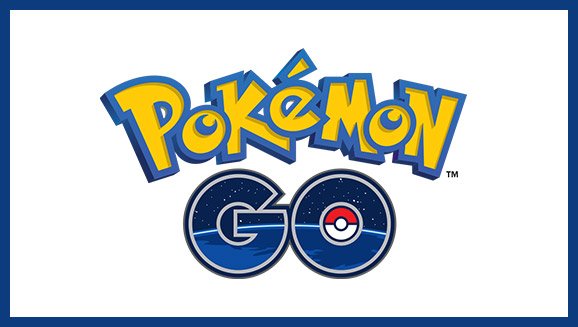

## **Loading Data**

In [ ]:
# install readr library
library(readr)
# loading dataset
pokemon <- read_csv("Pokemon.csv")

Rows: 800 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): Name, Type 1, Type 2
dbl (9): #, Total, HP, Attack, Defense, Sp. Atk, Sp. Def, Speed, Generation
lgl (1): Legendary

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [ ]:
# show  dataset
head(pokemon)

#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,FALSE
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,FALSE
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,FALSE
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,FALSE
4,Charmander,Fire,NA,309,39,52,43,60,50,65,1,FALSE
5,Charmeleon,Fire,NA,405,58,64,58,80,65,80,1,FALSE


## **Analyzing Dataset**

In [ ]:
# information about data
cat("Number of rows : ", nrow(pokemon))
cat("\nNumber of columns : ", ncol(pokemon))
cat("\nNumber of rows with null values : ",sum(is.na(pokemon)))

Number of rows :  800
Number of columns :  13
Number of rows with null values :  386

In [ ]:
# creating new dataset with types and number of pokemons
types <- as.data.frame(table(pokemon$`Type 1`))
# show new dataset
head(types)

,Var1,Freq
,<fct>,<int>
1,Bug,69
2,Dark,31
3,Dragon,32
4,Electric,44
5,Fairy,17
6,Fighting,27


In [ ]:
# laading palette library
library(RColorBrewer)
# loading ggplot visuzlization library
library(ggplot2)
install.packages("treemapify")
library(treemapify)

In [ ]:
mynamestheme <- theme(
  plot.title = element_text(family = "Helvetica", face = "bold", size = (15)),
  legend.title = element_text(colour = "steelblue", face = "bold.italic", family = "Helvetica"),
  legend.text = element_text(face = "italic", colour = "steelblue4", family = "Helvetica"),
  axis.title = element_text(family = "Helvetica", size = (10), colour = "steelblue4"),
  axis.text = element_text(family = "Courier", colour = "cornflowerblue", size = (10))
) 

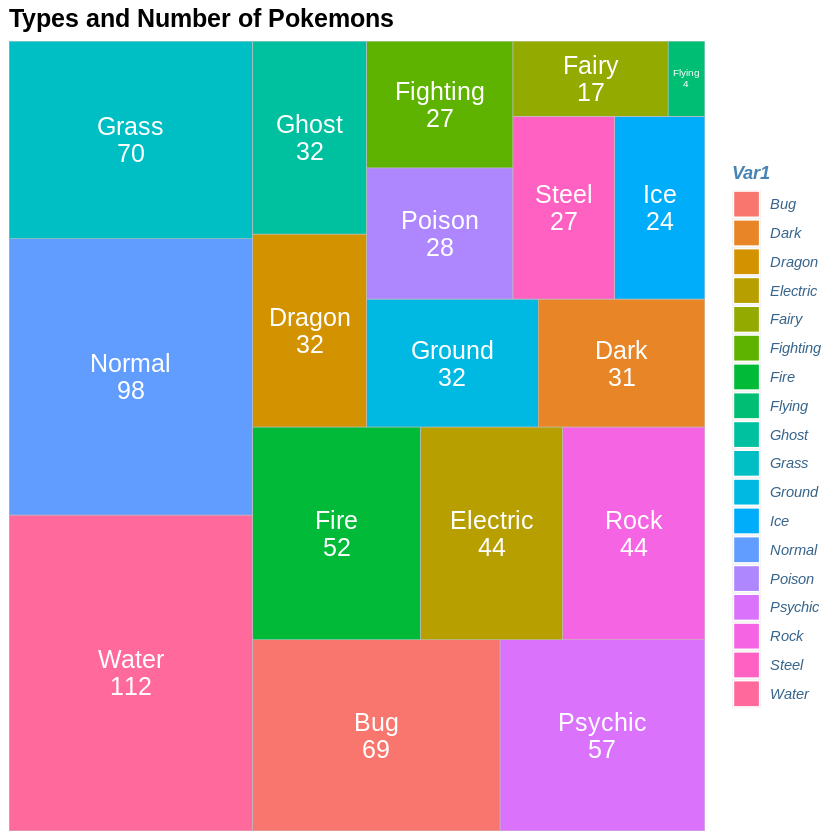

In [ ]:
treemap_types <- ggplot(types, aes(area = Freq, fill = Var1, 
label=paste(Var1, Freq, sep = "\n"))) + geom_treemap() + 
geom_treemap_text(colour = "white",
                    place = "centre",
                    size = 15)
print(treemap_types + mynamestheme + 
labs(title = "Types and Number of Pokemons"))

In [ ]:
# creating new dataset with Types and Total columns
types_by_total <- as.data.frame(aggregate(pokemon$Total, 
                list(pokemon$`Type 1`), FUN=mean))
# show new dataset
head(types_by_total)

,Group.1,x
,<chr>,<dbl>
1,Bug,378.9275
2,Dark,445.7419
3,Dragon,550.5312
4,Electric,443.4091
5,Fairy,413.1765
6,Fighting,416.4444


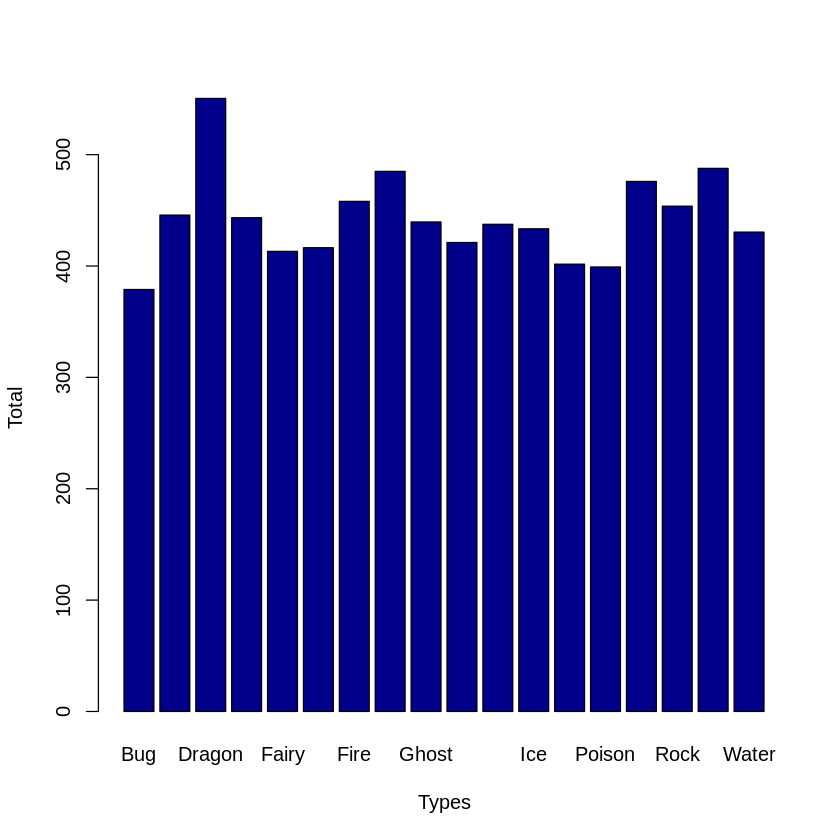

In [ ]:
# create bar chart presents types_by_total dataset
barplot(types_by_total$x,names.arg=types_by_total$`Group.1`, 
xlab="Types",ylab="Total",col="darkblue")

In [ ]:
# Creating new dataset with generation and number of pokemons
generation <- as.data.frame(table(pokemon$Generation))

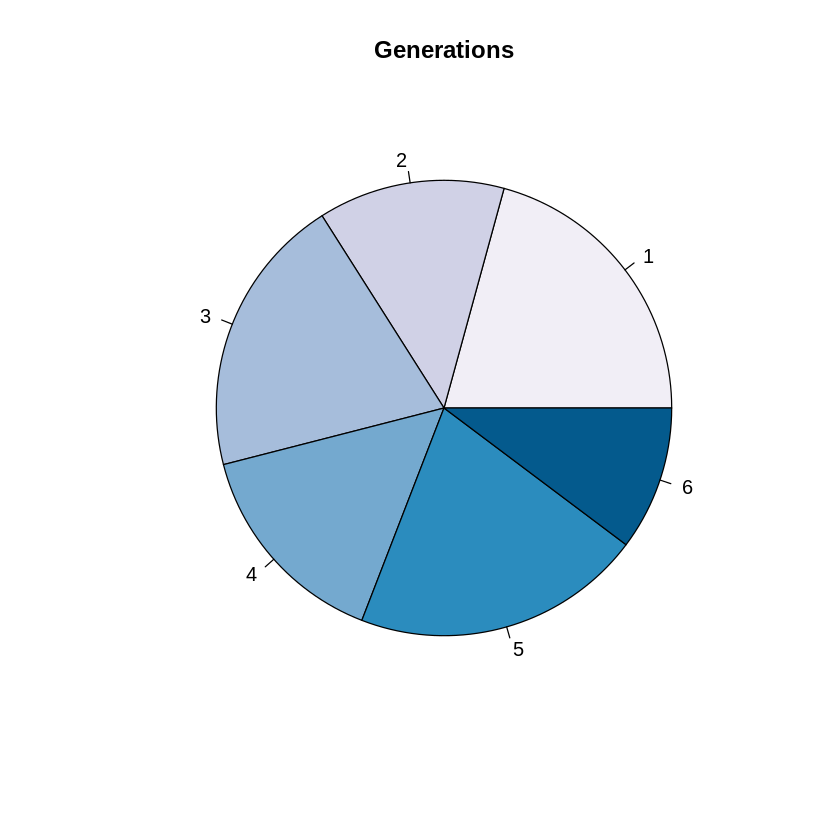

In [ ]:
pie(generation$Freq, labels = generation$Var1, main = "Generations", 
                              col = brewer.pal(6, "PuBu"))

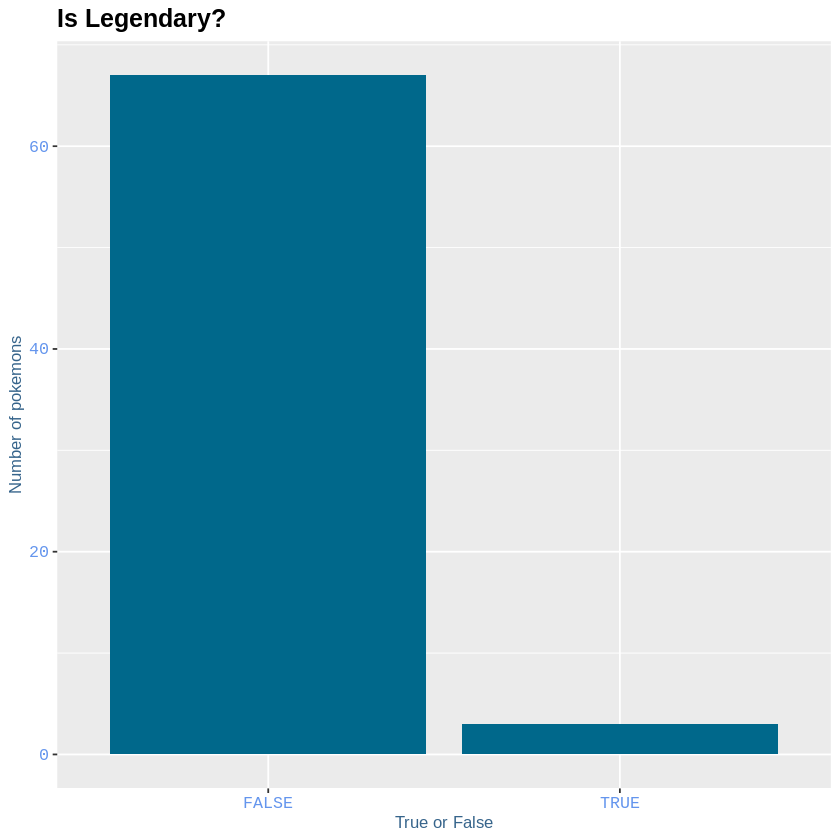

In [ ]:
# Analayzing how many pokemons have legendary or not
legbar1 <- ggplot(data = pokemon,aes(x=Legendary)) + geom_bar(fill="deepskyblue4")
print(legbar + mynamestheme + labs(title = "Is Legendary?", 
        y = "Number of pokemons", x = "True or False"))

In [ ]:
# General information about pokemon's pyschical abilities
cat("Minimum of Sp Attack : ",min(pokemon$`Sp. Atk`))
cat("\nMaximum of Sp Attack : ",max(pokemon$`Sp. Def`))
cat("\nMinimum of HP : ", min(pokemon$HP))
cat("\nMaximum of HP : ", max(pokemon$HP))

Minimum of Sp Attack :  10
Maximum of Sp Attack :  230
Minimum of HP :  1
Maximum of HP :  255

## **Data Manupulation**

In [ ]:
colnames(pokemon)[colnames(pokemon)== "Type 1"]<-"primary_type"
colnames(pokemon)[colnames(pokemon)=="Type 2"]<-"secondary_type"

## **Grass Pokemon**

In [ ]:
# Loading required library called dplyr
library(dplyr)  
# Split pokemon dataset to grass pokemon dataset
pokemon %>% filter(primary_type=="Grass") -> grass_pokemon

In [ ]:
# General analyzing grass pokemons
cat("Minimum speed of grass pokemons : ",min(grass_pokemon$Speed))
cat("\nMaximum speed of grass pokemons : ", max(grass_pokemon$Speed))
cat("\nAverage of Sp Attack of grass pokemons : ",mean(grass_pokemon$`Sp. Atk`))
cat("\nAverage of Sp Defence of grass pokemons : ", mean(grass_pokemon$`Sp. Def`))

Minimum speed of grass pokemons :  10
Maximum speed of grass pokemons :  145
Average of Sp Attack of grass pokemons :  77.5
Average of Sp Defence of grass pokemons :  70.42857

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



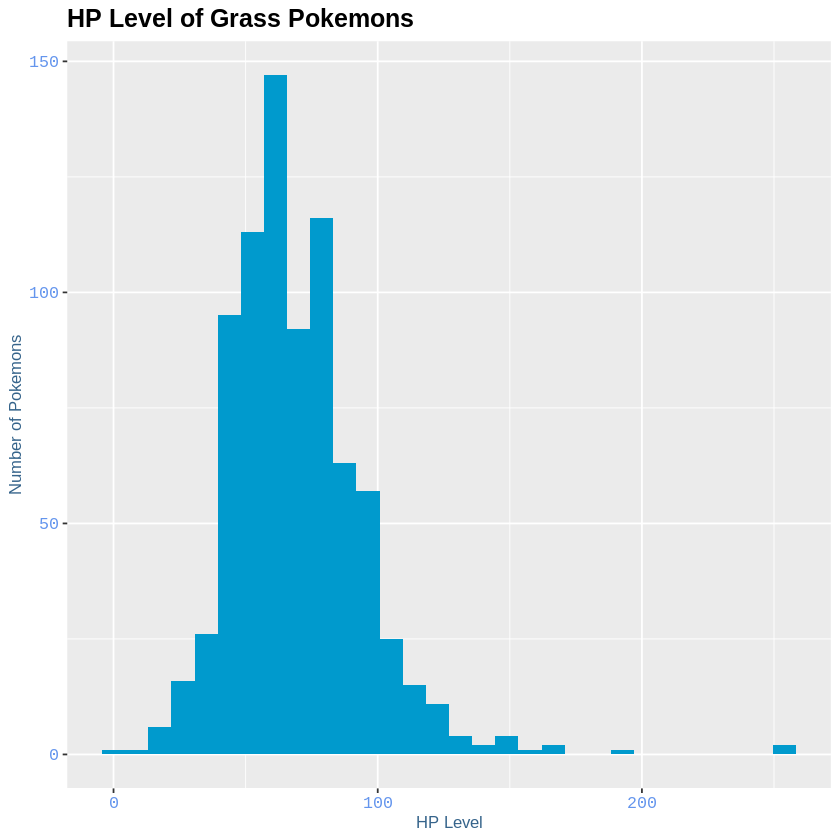

In [ ]:
# Analyzing HP of grass pokemons
histhp <- ggplot(data = pokemon,aes(x=HP)) + geom_histogram(fill="deepskyblue3")
print(histhp + mynamestheme + labs(title = "HP Level of Grass Pokemons", 
y = "Number of Pokemons", x = "HP Level"))

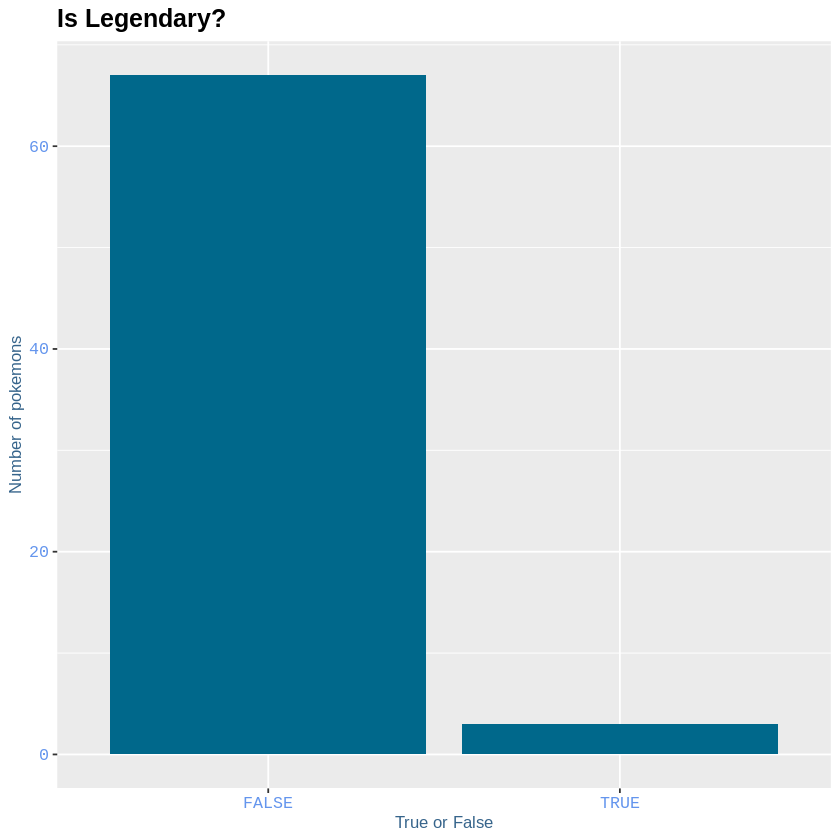

In [ ]:
# Analyzing legendary of grass pokemons
legbar <- ggplot(data = grass_pokemon, 
aes(x=Legendary)) + geom_bar(fill="deepskyblue4")
print(legbar + mynamestheme + labs(title = "Is Legendary?", 
        y = "Number of pokemons", x = "True or False"))

## **Fire Pokemon**

In [ ]:
pokemon %>% filter(primary_type=="Fire") -> fire_pokemon

min(fire_pokemon$Speed)
max(fire_pokemon$Speed)
mean(fire_pokemon$`Sp. Atk`)
mean(fire_pokemon$`Sp. Def`)

[1] 20

[1] 126

[1] 88.98077

[1] 72.21154

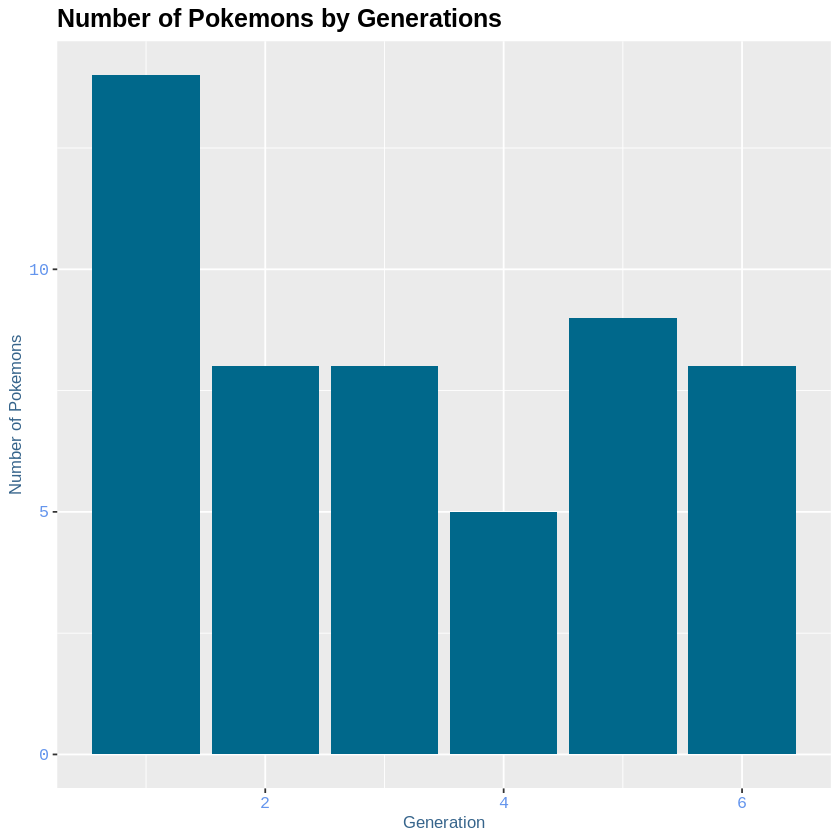

In [ ]:
genbar <- ggplot(data = fire_pokemon,
        aes(x=Generation)) + geom_bar(fill="deepskyblue4")
print(genbar + mynamestheme + labs(title = "Number of Pokemons by Generations", 
        y = "Number of Pokemons", x = "Generation"))

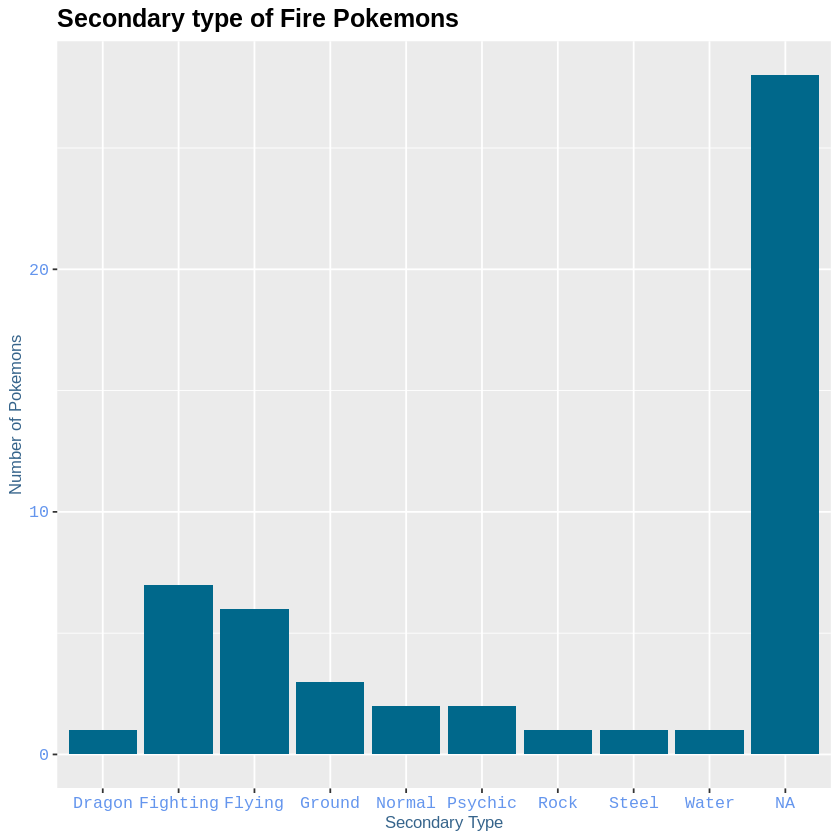

In [ ]:
sectpfire <- ggplot(data = fire_pokemon,
          aes(x=secondary_type)) + geom_bar(fill="deepskyblue4")
print(sectpfire + mynamestheme + labs(title = "Secondary type of Fire Pokemons", 
          y = "Number of Pokemons", x = "Secondary Type"))

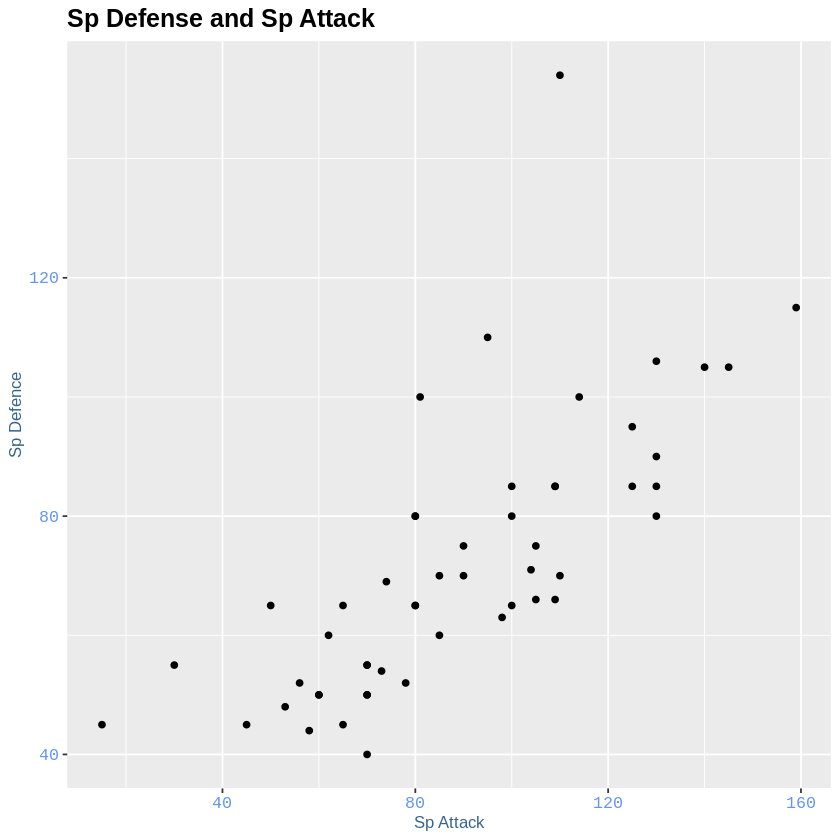

In [ ]:
scatfire <- ggplot(data = fire_pokemon,aes(x=`Sp. Atk`,y=`Sp. Def`)) + geom_point()
print(scatfire + mynamestheme + labs(title = "Sp Defense and Sp Attack", y = "Sp Defence", x = "Sp Attack"))

## **Water Pokemon**

In [ ]:
pokemon %>% filter(primary_type=="Water") -> water_pokemon

min(water_pokemon$Speed)
max(water_pokemon$Speed)

mean(water_pokemon$`Sp. Atk`)
mean(water_pokemon$`Sp. Def`)

[1] 15

[1] 122

[1] 74.8125

[1] 70.51786

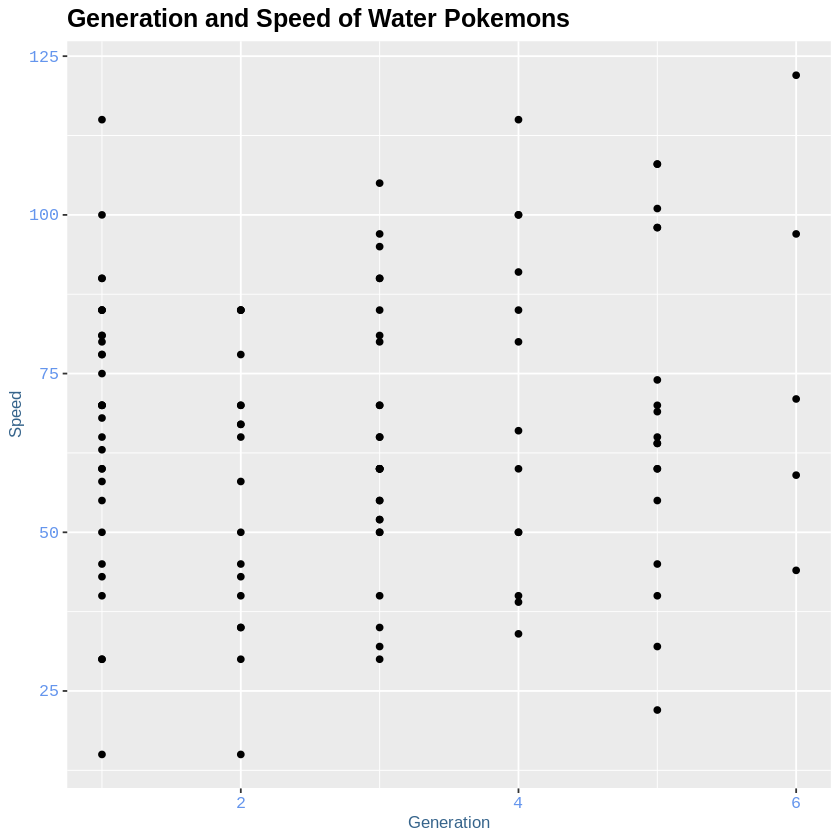

In [ ]:
spedofwater <- ggplot(data = water_pokemon,
          aes(x= Generation, y=Speed)) + geom_point(fill="deepskyblue4")
print(spedofwater + mynamestheme + 
labs(title = "Generation and Speed of Water Pokemons", 
          y = "Speed", x = "Generation"))